In [ ]:
pip install cdpkit

In [1]:
import CDPL.Chem as Chem

In [ ]:
import CDPL.Vis

In [2]:
mol = Chem.BasicMolecule()

In [3]:
mol.numAtoms
# or
#mol.getNumAtoms()

0

In [4]:
mol.numBonds
# or
#mol.getNumBonds()

0

In [6]:
a = mol.addAtom()

In [7]:
Chem.setType(a, Chem.AtomType.C)

In [8]:
Chem.getType(a)

6

In [9]:
# add second carbon atom
Chem.setType(mol.addAtom(), Chem.AtomType.C)

b = mol.addBond(0, 1)

In [10]:
Chem.setOrder(b, 2)

In [11]:
Chem.getOrder(b)

2

In [12]:
mol

In [13]:
# create missing atoms and set atom types
Chem.setType(mol.addAtom(), Chem.AtomType.C)
Chem.setType(mol.addAtom(), Chem.AtomType.C)
Chem.setType(mol.addAtom(), Chem.AtomType.C)
Chem.setType(mol.addAtom(), Chem.AtomType.N)

# create missing bonds and set orders
Chem.setOrder(mol.addBond(1, 2), 1)
Chem.setOrder(mol.addBond(2, 3), 2)
Chem.setOrder(mol.addBond(3, 4), 1)
Chem.setOrder(mol.addBond(4, 5), 2)
Chem.setOrder(mol.addBond(5, 0), 1)

In [14]:
mol.numBonds

6

In [15]:
mol.numAtoms

6

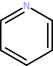

In [16]:
mol

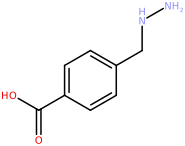

In [17]:
mol = Chem.parseSMILES('c1c(C(=O)O)ccc(CNN)c1')

mol

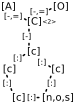

In [18]:
mol = Chem.parseSMARTS('c1:c:[n,o,s]:c:c:1-[C:2](-,=[*])-,=O')

mol

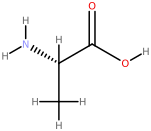

In [19]:
import CDPL.Base as Base

sdf_data = """5950
          12162506342D

 13 12  0     1  0  0  0  0  0999 V2000
    5.1350   -0.2500    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    4.2690    1.2500    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    2.5369    0.2500    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    3.4030   -0.2500    0.0000 C   0  0  1  0  0  0  0  0  0  0  0  0
    3.4030   -1.2500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    4.2690    0.2500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.4030    0.3700    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    2.7830   -1.2500    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    3.4030   -1.8700    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    4.0230   -1.2500    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    2.0000   -0.0600    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    2.5369    0.8700    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    5.6720    0.0600    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
  1  6  1  0  0  0  0
  1 13  1  0  0  0  0
  2  6  2  0  0  0  0
  4  3  1  6  0  0  0
  3 11  1  0  0  0  0
  3 12  1  0  0  0  0
  4  5  1  0  0  0  0
  4  6  1  0  0  0  0
  4  7  1  0  0  0  0
  5  8  1  0  0  0  0
  5  9  1  0  0  0  0
  5 10  1  0  0  0  0
M  END
> <PUBCHEM_COMPOUND_CID>
5950

$$$$
"""

ios = Base.StringIOStream(sdf_data)

reader = Chem.MoleculeReader(ios, 'sdf')
# or
#reader = Chem.MoleculeReader(ios, Chem.DataFormat.SDF)
# or
#reader = Chem.SDFMoleculeReader(ios)

reader.read(mol)
mol

In [20]:
smi_data = """c1n(ccn1)c1ccc(cc1)c1ccc(n1c1c(cc(cc1)C(=O)N)C)CCC(=O)[O-] 022_3QJ5_A
CNC(=O)[C@H](C(C)(C)C)NC(=O)[C@@H]([C@H](C)N([O-])C=O)CCCc1ccccc1 023_2WO9_B
N1N(C(c2c(C=1Nc1cc([nH]n1)C)ccc(N1CC[NH+](CC1)C)c2)=O)C(C)C 027_3PIX_A
"""

ios = Base.StringIOStream(smi_data)
reader = Chem.MoleculeReader(ios, 'smi')
mol_count = 0

while reader.read(mol):
   mol_count += 1

print(f'Read {mol_count} molecules')

Read 3 molecules


In [21]:
ios = Base.StringIOStream(smi_data)
reader = Chem.MoleculeReader(ios, 'smi')

num_mols = reader.getNumRecords()
# or
#num_mols = reader.numRecords

print(f'Number of input molecules: {num_mols}')

Number of input molecules: 3


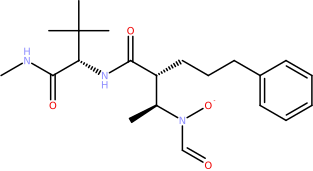

In [22]:
# read the 2nd molecule
reader.read(1, mol)

mol

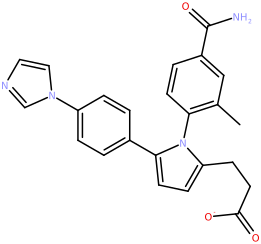

In [26]:
# read the 1st molecule
reader.read(0, mol)

mol

In [27]:
# there is no 4th molecule
reader.read(3, mol)

IndexError: StreamDataReader: record index out of bounds

In [31]:
sym_counts = {}
order_counts = {}

for i in range(0, mol.numAtoms):
    atom = mol.getAtom(i)
    sym = Chem.getSymbol(atom)

    if sym in sym_counts:
        sym_counts[sym] += 1
    else:
        sym_counts[sym] = 1

for i in range(0, mol.numBonds):
    bond = mol.getBond(i)
    order = Chem.getOrder(bond)

    if order in order_counts:
        order_counts[order] += 1
    else:
        order_counts[order] = 1

print(f'Element symbols: {sym_counts}')
print(f'Bond orders: {order_counts}')

Element symbols: {'C': 24, 'N': 4, 'O': 3}
Bond orders: {1: 22, 2: 12}
